# Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

## Getting the Dataset

In [24]:
df = pd.read_csv('Data.csv')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,25.38,184.60,2019.0,0.6656,0.7119,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,24.99,158.80,1956.0,0.1866,0.2416,0.1860
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,23.57,152.50,1709.0,0.4245,0.4504,0.2430
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,14.91,98.87,567.7,0.8663,0.6869,0.2575
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,22.54,152.20,1575.0,0.2050,0.4000,0.1625


## Exploring and Cleaning data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             569 non-null    int64  
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   smoothness_mean       569 non-null    float64
 6   compactness_mean      569 non-null    float64
 7   concavity_mean        569 non-null    float64
 8   concave points_mean   569 non-null    float64
 9   symmetry_mean         569 non-null    float64
 10  radius_worst          569 non-null    float64
 11  perimeter_worst       569 non-null    float64
 12  area_worst            569 non-null    float64
 13  compactness_worst     569 non-null    float64
 14  concavity_worst       569 non-null    float64
 15  concave points_worst  5

In [26]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,16.269190,107.261213,880.583128,0.254265,0.272188,0.114606
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,4.833242,33.602542,569.356993,0.157336,0.208624,0.065732
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,7.930000,50.410000,185.200000,0.027290,0.000000,0.000000
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,13.010000,84.110000,515.300000,0.147200,0.114500,0.064930
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,14.970000,97.660000,686.500000,0.211900,0.226700,0.099930
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,18.790000,125.400000,1084.000000,0.339100,0.382900,0.161400
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,36.040000,251.200000,4254.000000,1.058000,1.252000,0.291000


In [27]:
df.isnull().sum()

diagnosis               0
radius_mean             0
texture_mean            0
perimeter_mean          0
area_mean               0
smoothness_mean         0
compactness_mean        0
concavity_mean          0
concave points_mean     0
symmetry_mean           0
radius_worst            0
perimeter_worst         0
area_worst              0
compactness_worst       0
concavity_worst         0
concave points_worst    0
dtype: int64

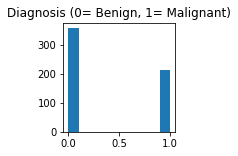

In [28]:
plt.figure(figsize=(2, 2))
plt.hist(df['diagnosis'])
plt.title('Diagnosis (0= Benign, 1= Malignant)')
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

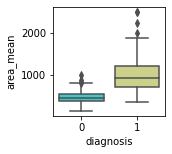

In [29]:

plt.figure(figsize=(2, 2))
# a= df['area_mean']
# b=df['radius_mean']

# sns.scatterplot(a,b)

sns.boxplot(x="diagnosis", y="area_mean", data=df,palette='rainbow')

<AxesSubplot:>

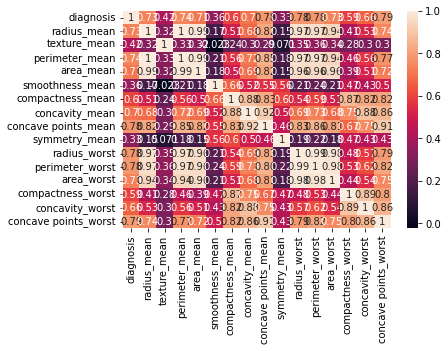

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
y = df['diagnosis']
X = df.drop(['diagnosis','smoothness_mean','symmetry_mean','texture_mean'],axis=1)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.head())

     radius_mean  perimeter_mean  area_mean  compactness_mean  concavity_mean  \
476        14.20           92.41      618.4           0.11080         0.05063   
130        12.19           79.08      455.8           0.09509         0.02855   
246        13.20           84.13      541.6           0.04524         0.04336   
205        15.12           98.78      716.6           0.09588         0.07550   
16         14.68           94.74      684.5           0.07200         0.07395   

     concave points_mean  radius_worst  perimeter_worst  area_worst  \
476              0.03058         16.45           112.10       828.5   
130              0.02882         13.34            91.38       545.2   
246              0.01105         13.94            88.28       602.0   
205              0.04079         17.77           117.70       989.5   
16               0.05259         19.07           123.40      1138.0   

     compactness_worst  concavity_worst  concave points_worst  
476             0.3429

In [33]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print(classification_report(y_test, y_pred))
report_pm = classification_report(y_test, y_pred,output_dict=True)

[[72  0]
 [21 21]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        72
           1       1.00      0.50      0.67        42

    accuracy                           0.82       114
   macro avg       0.89      0.75      0.77       114
weighted avg       0.86      0.82      0.80       114



In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [35]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[71  1]
 [ 4 38]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [98]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict(X_test)
clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
print(classification_report(y_test, y_pred))
report_lr = classification_report(y_test, y_pred,output_dict=True )

[[71  1]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



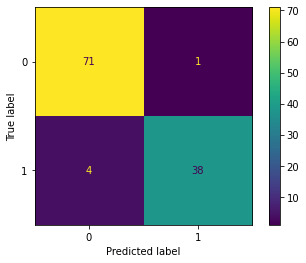

In [50]:
# plt.figure(figsize=(4, 3))
# sns.heatmap(confusion_mat, annot=True)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [99]:
print(report_lr['weighted avg']['f1-score'])
print(report_lr['accuracy'])

0.9467638691322903
0.9473684210526315


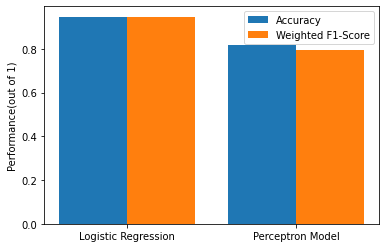

In [122]:
import numpy as np 



models = ['Logistic Regression','Perceptron Model']
Accuracy = [report_lr['accuracy'],report_pm['accuracy']]
f1score = [report_lr['weighted avg']['f1-score'],report_pm['weighted avg']['f1-score']]

x_axis = np.arange(len(models))

plt.bar(x_axis -0.2, Accuracy, width=0.4, label = 'Accuracy')
plt.bar(x_axis +0.2, f1score, width=0.4, label = 'Weighted F1-Score')
plt.ylabel('Performance(out of 1)')
plt.xticks(x_axis, models)
plt.legend()
plt.show()

Logistic Regression: 0.945551 (0.032738)
Perceptron: 0.855921 (0.106037)


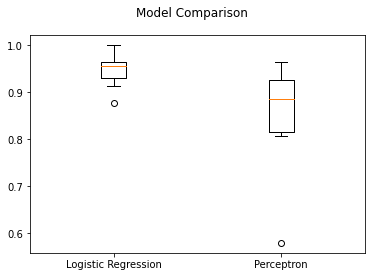

In [133]:
from sklearn import model_selection
seed = 3
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Perceptron', Perceptron()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()